# Modelo(s) en Python para Predecir los Precios de las Viviendas

Nivel: Principiantes

### Teoría de Precios Hedónicos

La Teoría de Precios Hedónicos pretende explicar el valor de un bien, entendido
como un conjunto de atributos (superficie, aptitud de uso del suelo, calidad de la
construcción, diseño interior y exterior, áreas verdes, ubicación, características del
vecindario, etc.), en función de cada uno de ellos, obteniendo sus respectivas valoraciones.

El modelo permite identificar la importancia relativa de cada atributo en el valor asignado por el mercado a un bien particular, mediante lo cual es posible
determinar cómo cambiará dicho valor al variar la cantidad y calidad en que se encuentra presente cada uno de estos atributos, y consecuentemente, ayudar a explicar y predecir precios.

El Método de Regresiones Hedónicas atribuido a Rosen (1974) y Lancaster (1966) se basa en estimaciones del precio de un producto a partir de un vector de características del mismo, en el que pueden calcularse contribuciones marginales de cada una de esas características sobre la variable dependiente y así estimar los efectos condicionales de determinadas características sobre el precio (Hill, 2011).

La etiqueta de precios hedónicos, reflejaba el bienestar o disfrute (que es lo que significa originalmente hedónico en riego) que ofrece cada componente.

Fuente: (manfrino, 2021) y (Lopez,s.f.)


## Etapa 2: EDA

### 1. Explorar la data

In [2]:
# libreriras
import pandas as pd               # libreria para la manipulacion y tratamiento de datos
import seaborn as sns             # libreria para crear graficos
import numpy as np                # libreria para el cálculo numérico y el análisis de datos
import matplotlib.pyplot as plt   # libreria de graficos
%matplotlib inline                # hace que las graficas se muestren directamente en el notebook
from scipy import stats           # librería para matemáticas, ciencias e ingeniería

import warnings
warnings.filterwarnings('ignore')


In [ ]:
# montar drive
from google.colab import drive
drive.mount('/content/gdrive')


In [4]:
# importar y asignar data a un df
df = pd.read_csv("/content/gdrive/MyDrive/SeriesTiempo Forcasting/BostonHousing/boston_house_prices.csv")


In [5]:
# informacion general del datset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
# ver primeras filas
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Descripcion por variable:

  - CRIM     per capita crime rate by town

  - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.

  - INDUS    proportion of non-retail business acres per town

  - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

  - NOX      nitric oxides concentration (parts per 10 million)

  - RM       average number of rooms per dwelling

  - AGE      proportion of owner-occupied units built prior to 1940

  - DIS      weighted distances to five Boston employment centres

  - RAD      index of accessibility to radial highways

  - TAX      full-value property-tax rate per $10,000

  - PTRATIO  pupil-teacher ratio by town

  - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

  - LSTAT    % lower status of the population

  - MEDV     Median value of owner-occupied homes in $1000's


In [7]:
# eliminar columna
df.drop('B', axis=1, inplace=True)


In [8]:
# ver tipo y cantidad de datos
print('"1. Conteo Tipo de Dato"')
tipos_datos = df.dtypes
print(tipos_datos.value_counts())
print('==========================')

## ver tipo datos en %
print('"2. % por Tipo de Dato"')
tipos_datos = df.dtypes
print(tipos_datos.value_counts(normalize=True))


"1. Conteo Tipo de Dato"
float64    10
int64       3
dtype: int64
"2. % por Tipo de Dato"
float64    0.769231
int64      0.230769
dtype: float64


In [9]:
# número de elementos únicos en cada columna, excluye los valores NaN
df.nunique()


CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
LSTAT      455
MEDV       229
dtype: int64

In [10]:
# ver datos nulos por columna
df.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
# ver valores nulos por fila
df[df.isnull().any(axis=1)]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV


In [12]:
# estadistica descriptiva
round(df.describe(), 2).T.style.background_gradient(cmap='YlOrRd')


,count,mean,std,min,25%,50%,75%,max
CRIM,506.000000,3.610000,8.600000,0.010000,0.080000,0.260000,3.680000,88.980000
ZN,506.000000,11.360000,23.320000,0.000000,0.000000,0.000000,12.500000,100.000000
INDUS,506.000000,11.140000,6.860000,0.460000,5.190000,9.690000,18.100000,27.740000
CHAS,506.000000,0.070000,0.250000,0.000000,0.000000,0.000000,0.000000,1.000000
NOX,506.000000,0.550000,0.120000,0.380000,0.450000,0.540000,0.620000,0.870000
RM,506.000000,6.280000,0.700000,3.560000,5.890000,6.210000,6.620000,8.780000
AGE,506.000000,68.570000,28.150000,2.900000,45.020000,77.500000,94.070000,100.000000
DIS,506.000000,3.800000,2.110000,1.130000,2.100000,3.210000,5.190000,12.130000
RAD,506.000000,9.550000,8.710000,1.000000,4.000000,5.000000,24.000000,24.000000
TAX,506.000000,408.240000,168.540000,187.000000,279.000000,330.000000,666.000000,711.000000


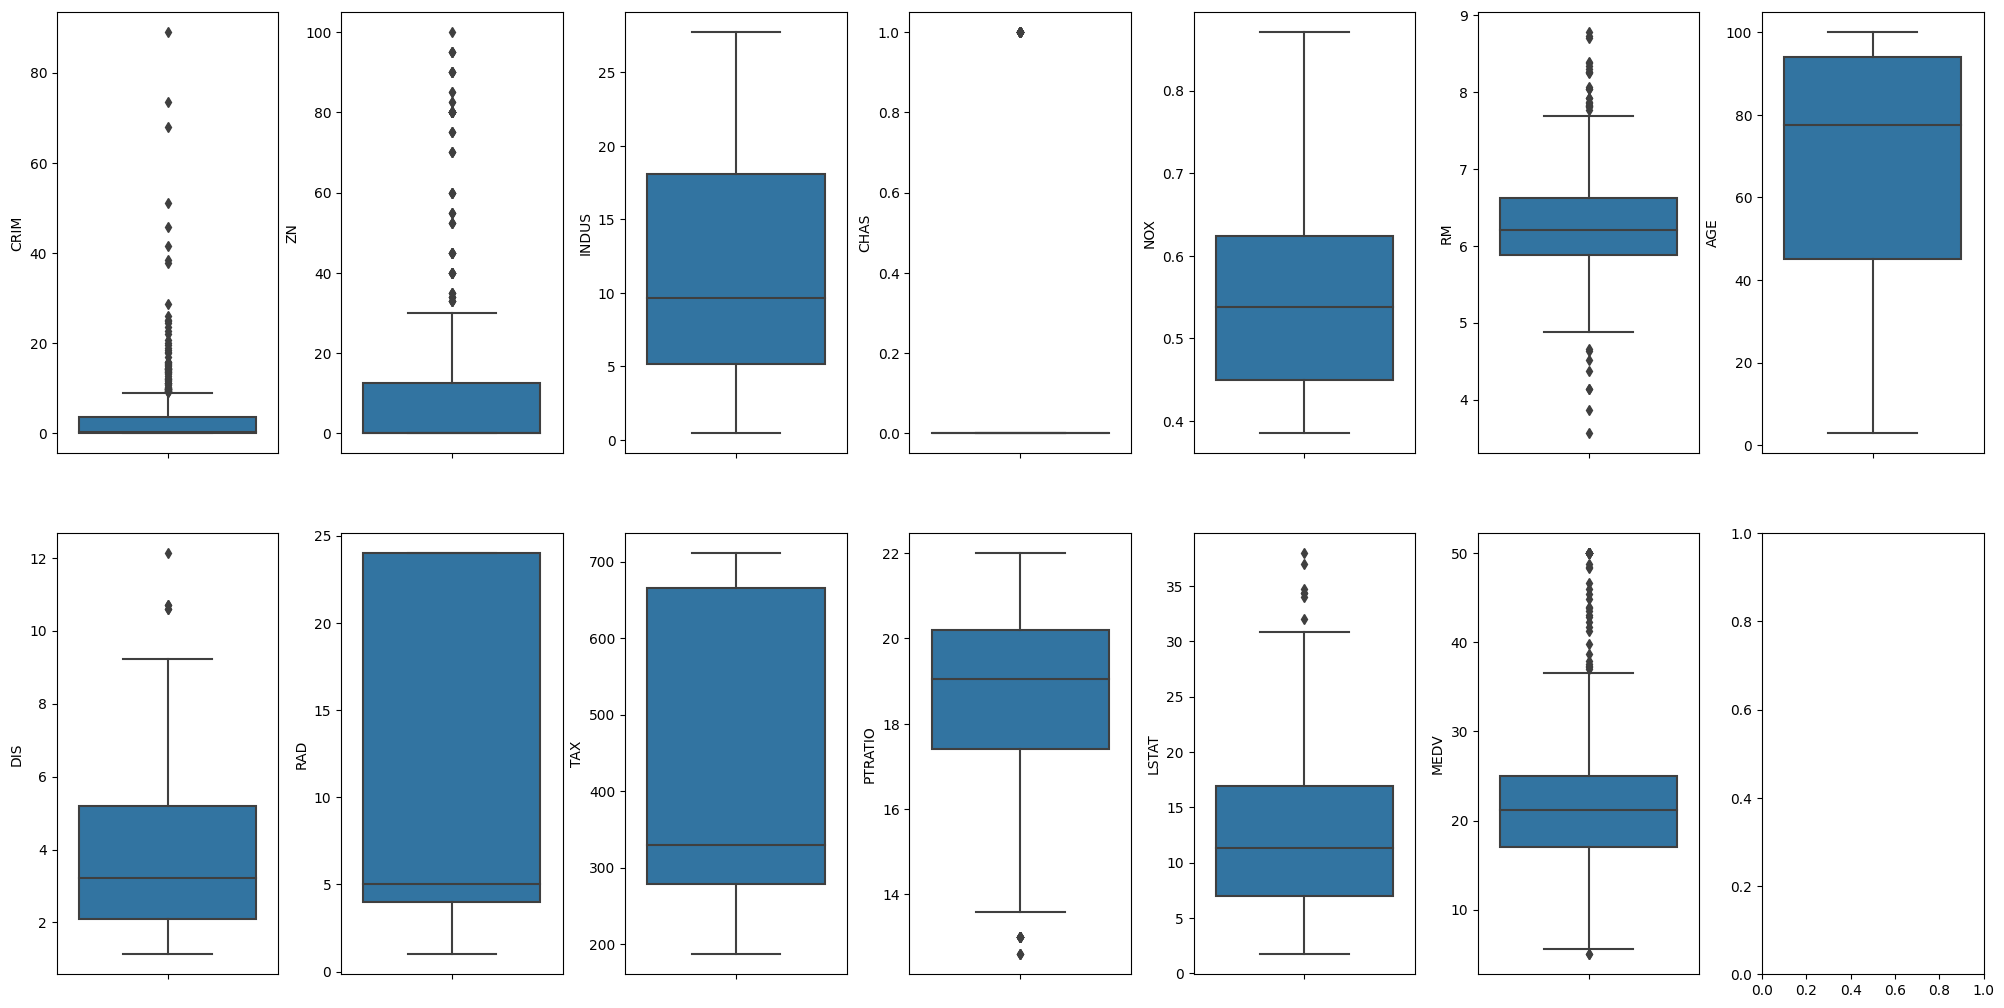

In [13]:
# ver la distribucion por variable
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


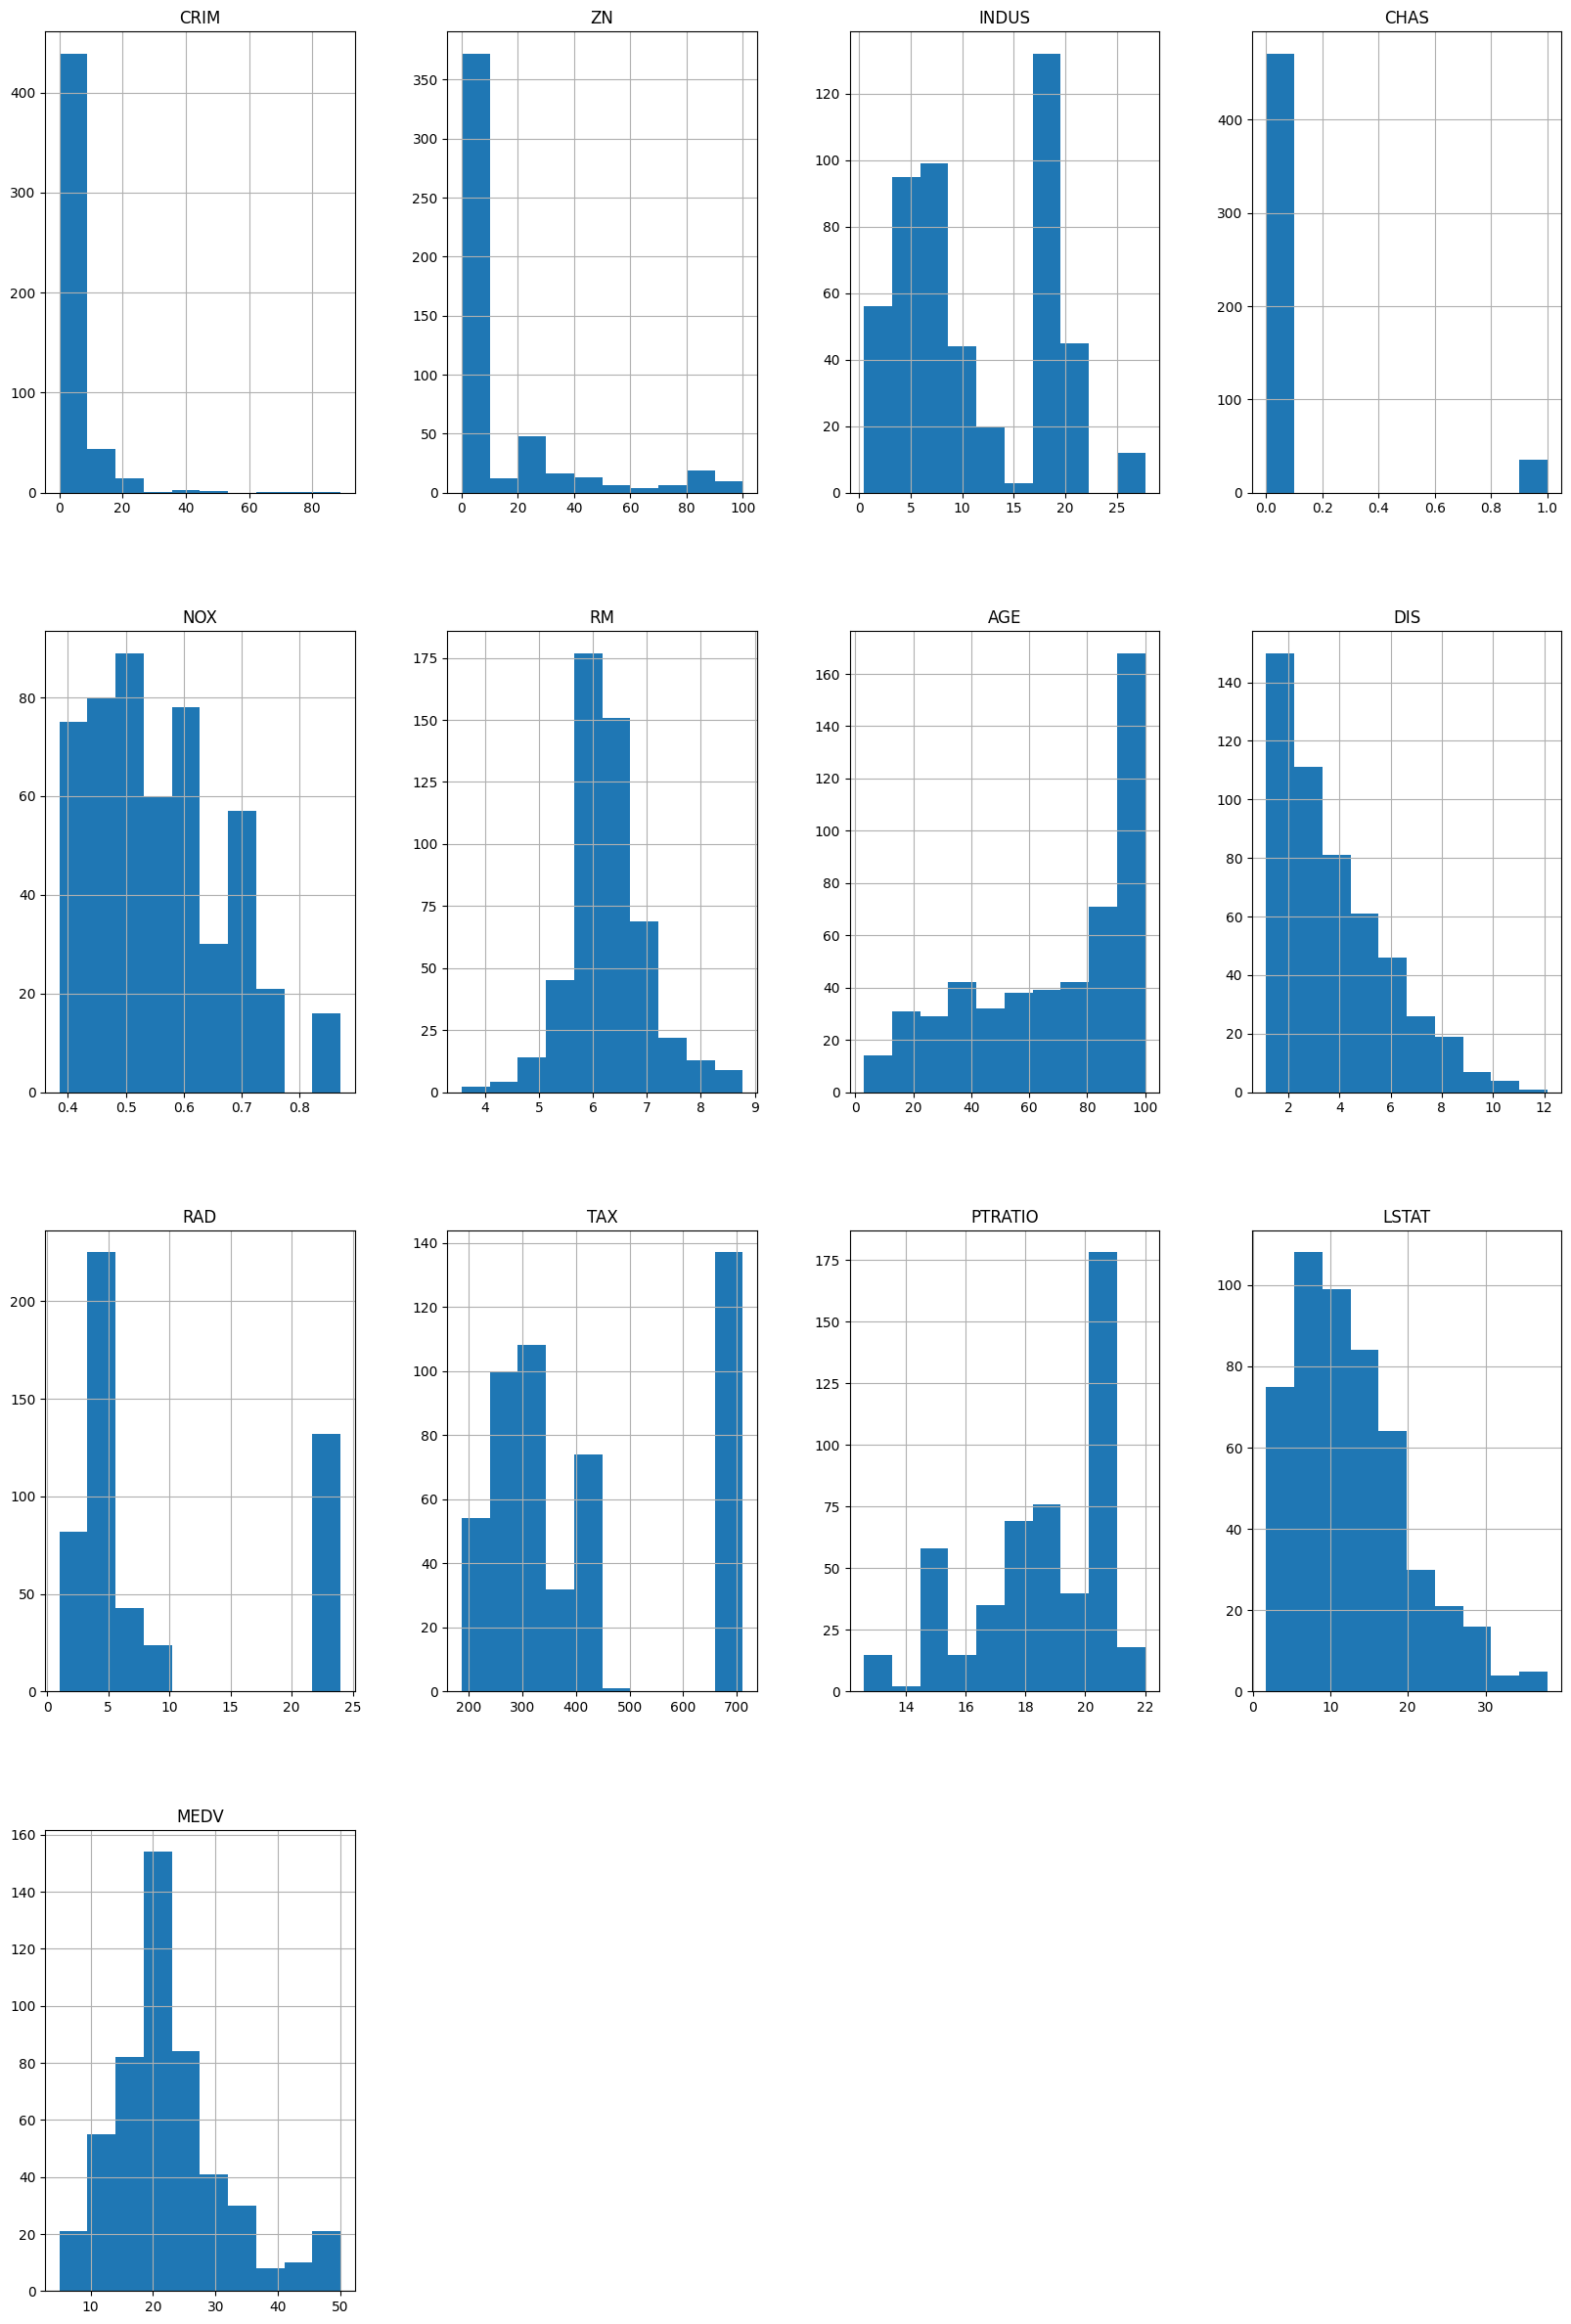

In [14]:
# distribucion de frecuencias por variable
df.hist(figsize=(20,30))
plt.show()


In [15]:
#matriz de correlacion
matriz_correlation = df.corr().style.background_gradient(cmap='YlOrRd')
matriz_correlation


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


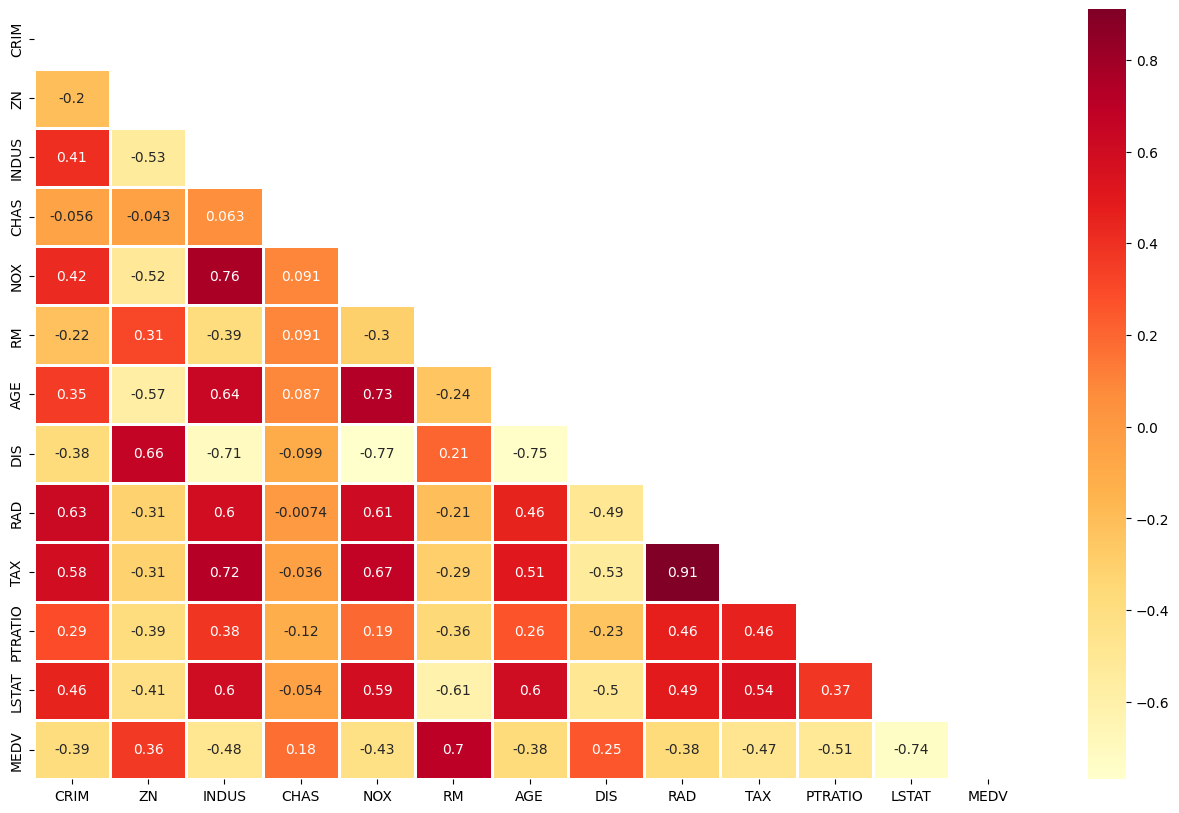

In [16]:
#grafico de correlacion con heatmap
plt.figure(figsize=(16, 10))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,
            linewidth=.8, mask=matrix, cmap='YlOrRd');


Las variabbles que tienen correlacion con MEDV, son:

LSTAT -0.74 % más bajo de la población, negativa

RM 0.7 número medio de habitaciones por vivienda, positiva

PTRATIO -0.51 ratio alumno-profesor por ciudad

TAX -0.47  tipo del impuesto sobre bienes inmuebles de valor íntegro por 10.000 dólares

INDUS -0.48 proporción de acres comerciales no minoristas por ciudad

NOX  -0.43 concentración de óxidos nítricos

RAD -0.38 índice de accesibilidad a autopistas radiales

### 2. Outliers

In [17]:
# funcion detectar outilers por columna (features
def detectar_outliers(df):
    cols = list(df)
    outliers = pd.DataFrame(columns = ['Columna', 'Numero de Outliers'])
    for column in cols:
        if column in df.select_dtypes(include=np.number).columns:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            minimo = Q1 - (1.5*IQR)
            maximo = Q3 + (1.5*IQR)
            outliers = outliers.append({'Columna':column, 'Numero de Outliers':df.loc[(df[column] < minimo) | (df[column] > maximo)].shape[0]},ignore_index=True)
    return outliers

detectar_outliers(df)


,Columna,Numero de Outliers
0,CRIM,66
1,ZN,68
2,INDUS,0
3,CHAS,35
4,NOX,0
5,RM,30
6,AGE,0
7,DIS,5
8,RAD,0
9,TAX,0


In [18]:
# funcion para tratar valores atipico
from scipy.stats.mstats import winsorize # [1]

def valores_atipicos (df):
    cols = list(df)
    for col in cols:
        if col in df.select_dtypes(include=np.number).columns:
            df[col] = winsorize(df[col], limits=[0.05, 0.05],inclusive=(True, True))

    return df

df_wins = valores_atipicos(df)

# [1] Winsorize:el método define un intervalo de confianza de, por ejemplo, el 90% y,
# a continuación sustituye todos los valores atípicos por debajo del percentil 5 por el valor del percentil 5 y todos los valores por encima del percentil 95 por el valor del percentil 95.
# Este método es útil cuando hay valores negativos en los datos y ceros en las características que no se pueden tratar con transformadas logarítmicas o raíces cuadradas.


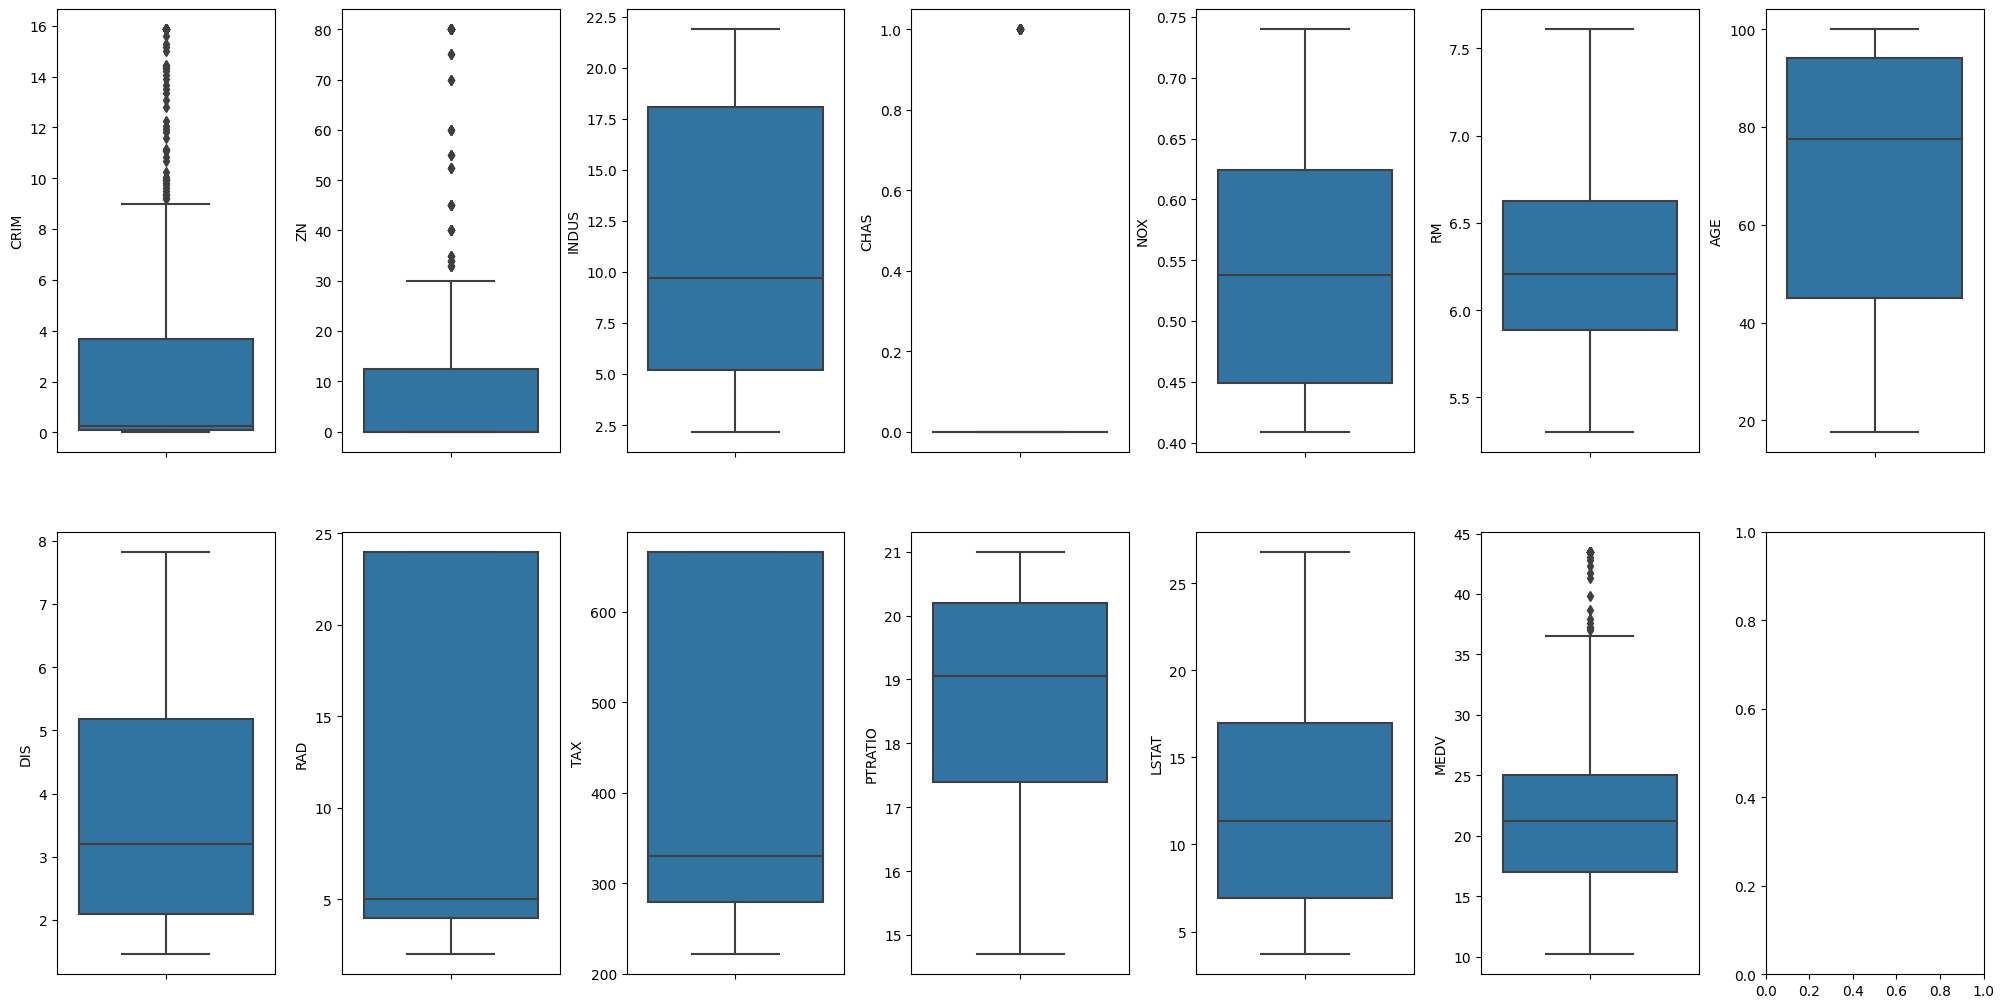

In [19]:
# verificar cambios realizados por Winsorize
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df_wins, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


<Axes: >

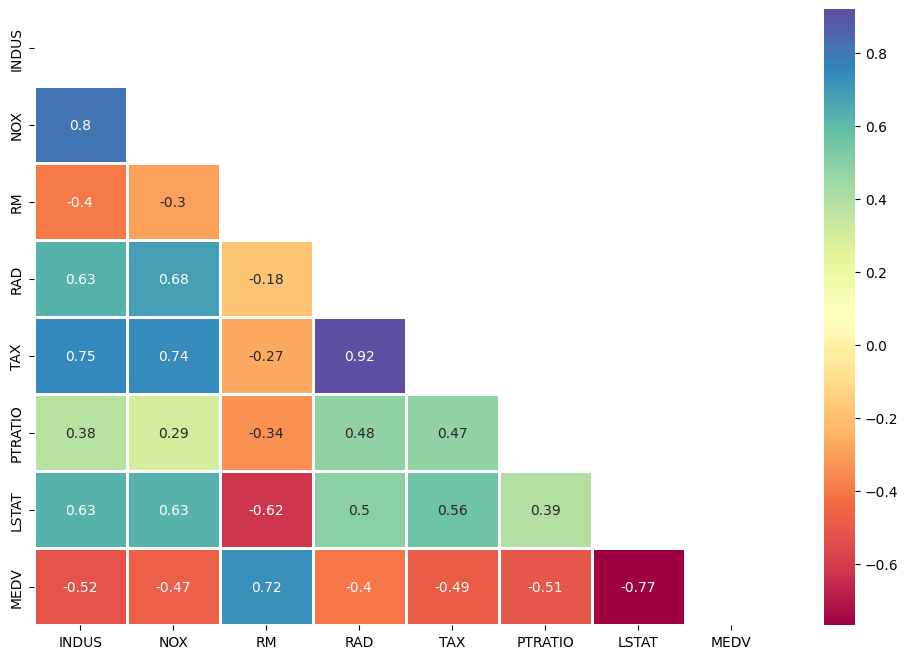

In [20]:
# grafico de correlacion con heatmap con Winsorize
plt.figure(figsize=(12, 8))
matrix = np.triu(df_wins[[ 'INDUS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']].corr())
sns.heatmap(df_wins[[ 'INDUS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']].corr(), annot=True, linewidth=.8, mask=matrix, cmap="Spectral")

# De las siete variables relacionadas, seis cambiaron del valor inicial


Las variabbles que tienen **correlacion con el precio (MEDV)** que cambio y NO cambio el indicador:

LSTAT de -0.74 a -0.77 (% más bajo de la población), negativa

RM de 0.7 a 0.72 (número medio de habitaciones), positiva

INDUS de -0.48 a -0.52 (proporción de acres comerciales no minoristas por ciudad)

PTRATIO -0.51 a NO cambio (ratio alumno-profesor por ciudad)

TAX -0.47 a No cambio (tipo del impuesto sobre bienes inmuebles de valor íntegro por 10.000 dólares)

NOX de -0.43 a -0.47 (concentración de óxidos nítricos)

RAD de -0.38 a -0.4 (índice de accesibilidad a autopistas radiales)

**Correlacion entre variables**

INDUS y NOX = 0.8 ; IDUS y TAX = 0.75

NNOX y TX = 0.74 ; NOX y RAD = 0.74 ; NOX y LSTAT = 0.6 3

RM y LSTAT = -0.62

RAD y TAX = 0.92

### 3. Explorar cada una de las variables relacionadas con el precio

#### 3.1 LSTAT % lower status of the population

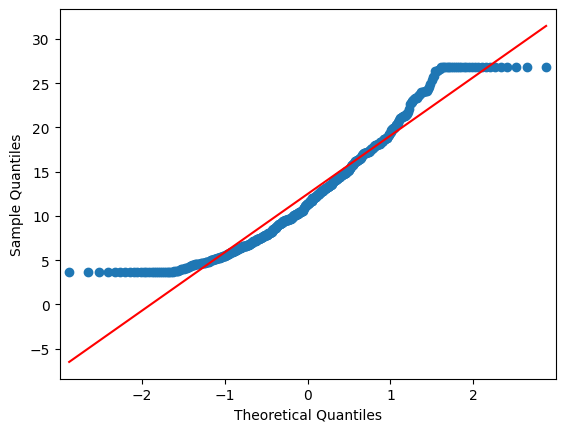

1. % más bajo de la población (Despues de Winsorize)


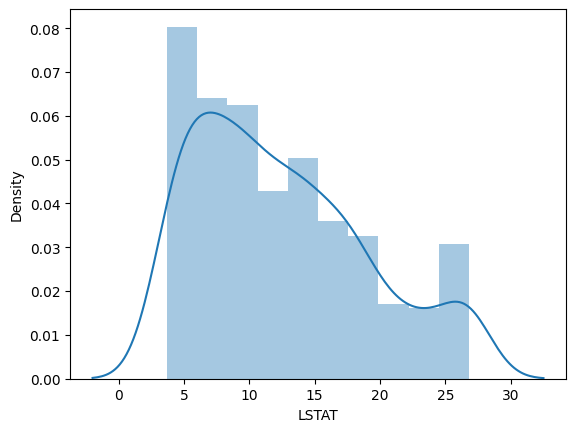

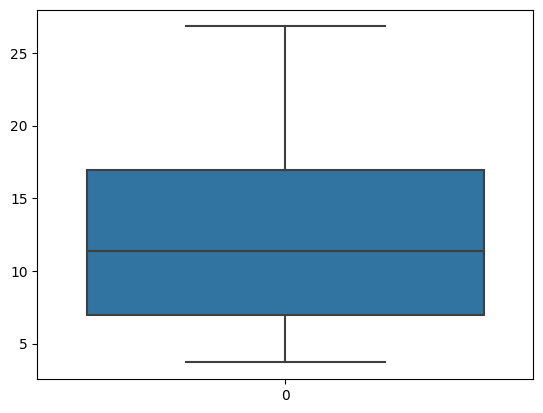

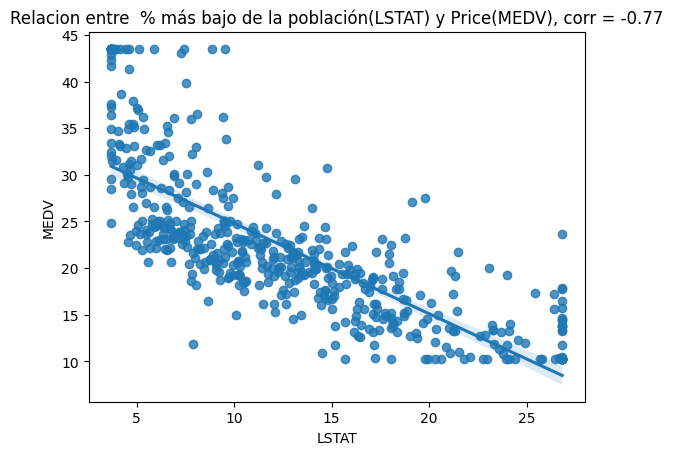

In [21]:
# hacer grafico Q-Q
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

qqplot(df_wins['LSTAT'], line = 's')
plt.show ()

# Chequear la normalidad de las variables seleccionadas
sns.distplot(df_wins['LSTAT'])
print("1. % más bajo de la población (Despues de Winsorize)")
plt.show()

sns.boxplot(df_wins['LSTAT'])
plt.show()

# Correlacion entre LSTAT y MEDV
sns.regplot(x="LSTAT", y="MEDV", data=df_wins, fit_reg=True)
plt.title("Relacion entre  % más bajo de la población(LSTAT) y Price(MEDV), corr = -0.77")
plt.show()


#### 3.2 RM average number of rooms per dwelling

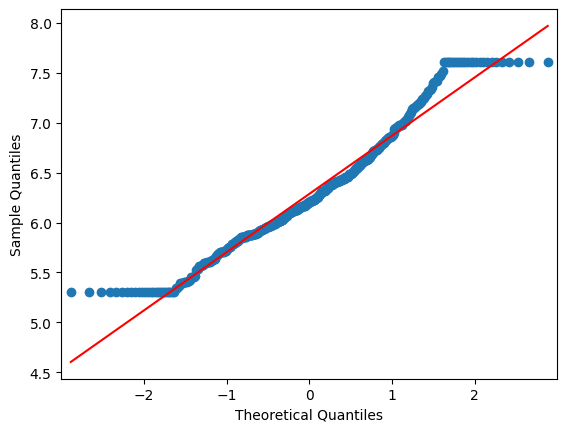

2. número medio de habitaciones (Despues de Winsorize)


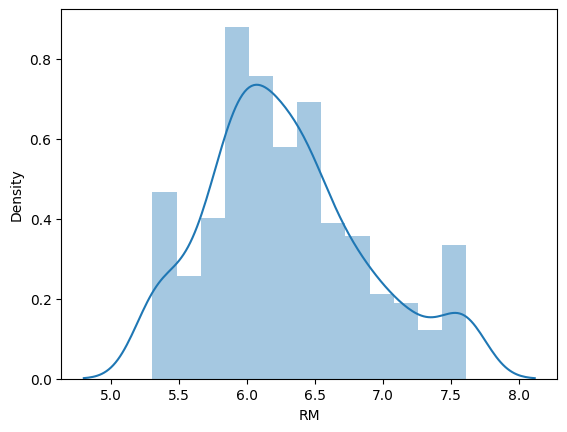

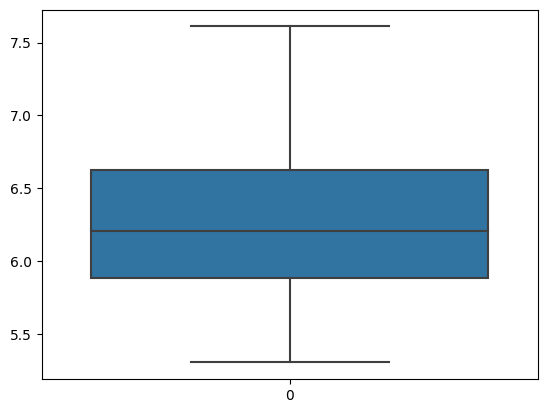

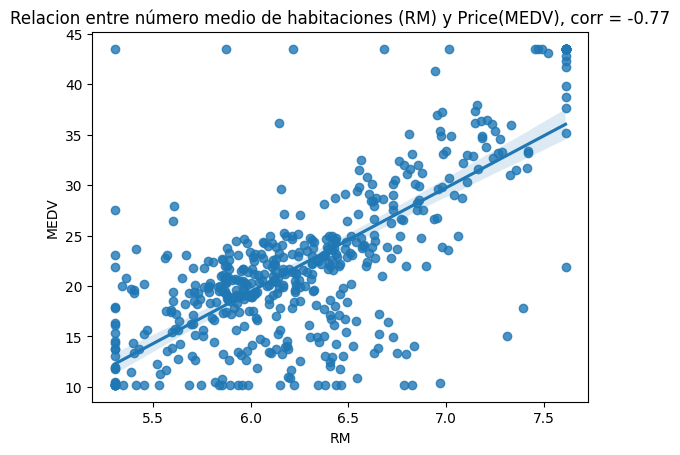

In [22]:
# hacer grafico Q-Q
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

qqplot(df_wins['RM'], line = 's')
plt.show ()


# Chequear la normalidad de las variables seleccionadas
sns.distplot(df_wins['RM'])
print("2. número medio de habitaciones (Despues de Winsorize)")
plt.show()


sns.boxplot(df_wins['RM'])
plt.show()

# Correlacion entre LSTAT y MEDV
sns.regplot(x="RM", y="MEDV", data=df_wins, fit_reg=True)
plt.title("Relacion entre número medio de habitaciones (RM) y Price(MEDV), corr = -0.77")
plt.show()


### 3.3 INDUS proportion of non-retail business acres per town

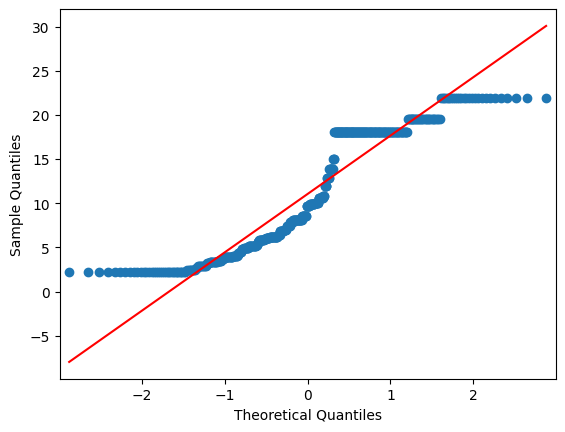

3. proporción de acres comerciales no minoristas por ciudad (Despues de Winsorize)


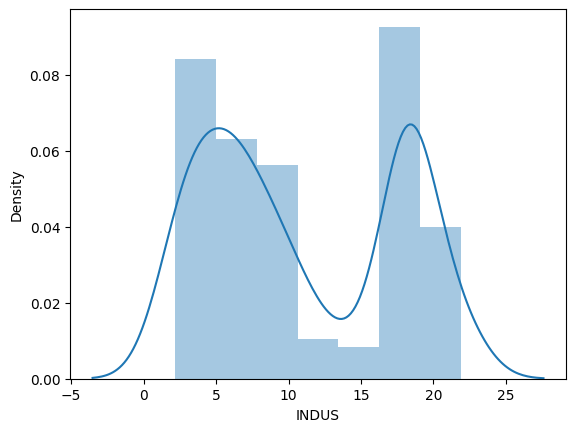

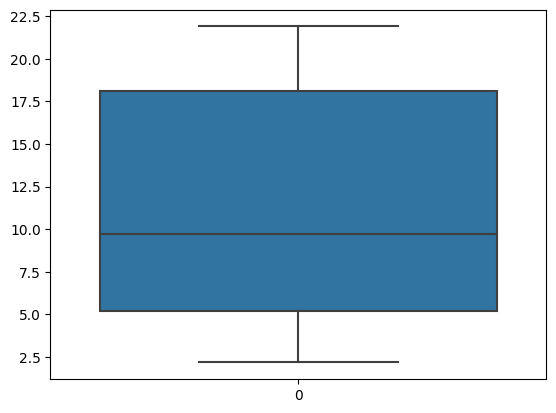

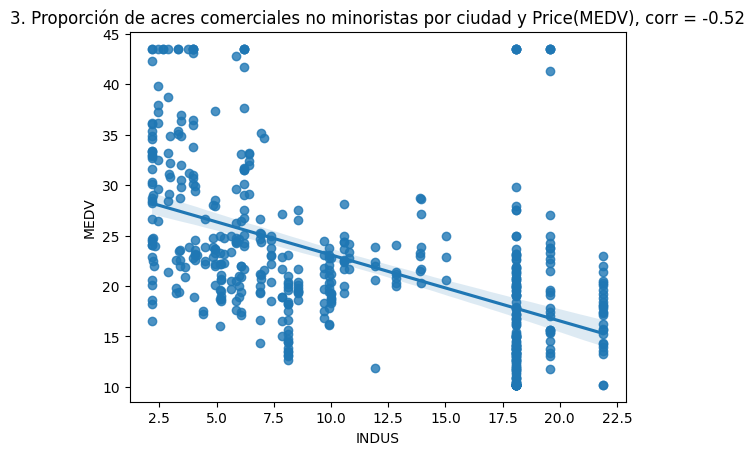

In [23]:
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

qqplot(df_wins['INDUS'], line = 's')
plt.show ()


# Chequear la normalidad de las variables seleccionadas
sns.distplot(df_wins['INDUS'])
print("3. proporción de acres comerciales no minoristas por ciudad (Despues de Winsorize)")
plt.show()

sns.boxplot(df_wins['INDUS'])
plt.show()

# Correlacion entre INDUS y MEDV
sns.regplot(x="INDUS", y="MEDV", data=df_wins, fit_reg=True)
plt.title("3. Proporción de acres comerciales no minoristas por ciudad y Price(MEDV), corr = -0.52")
plt.show()


### 3.4 PTRATIO pupil-teacher ratio by town

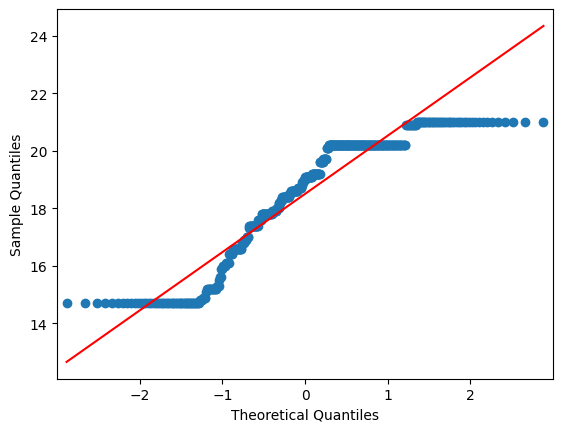

4. ratio alumno-profesor por ciudad (Despues de Winsorize)


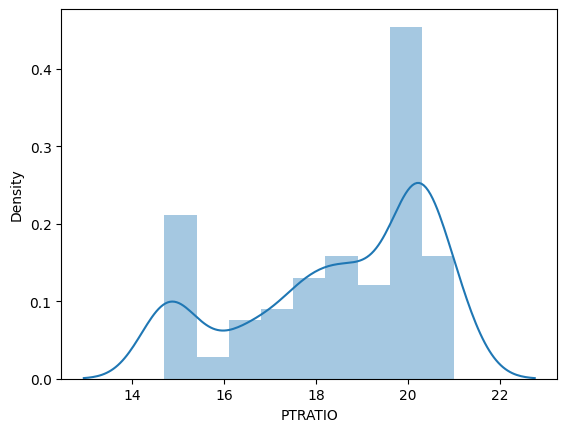

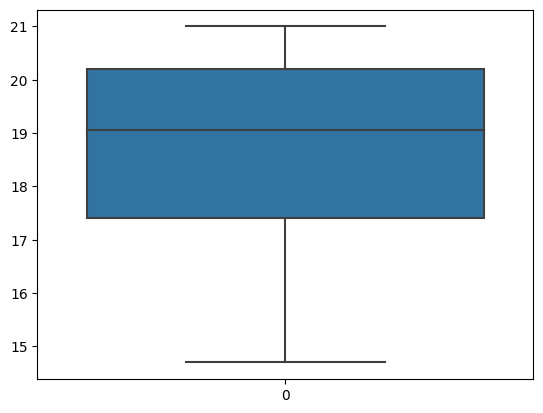

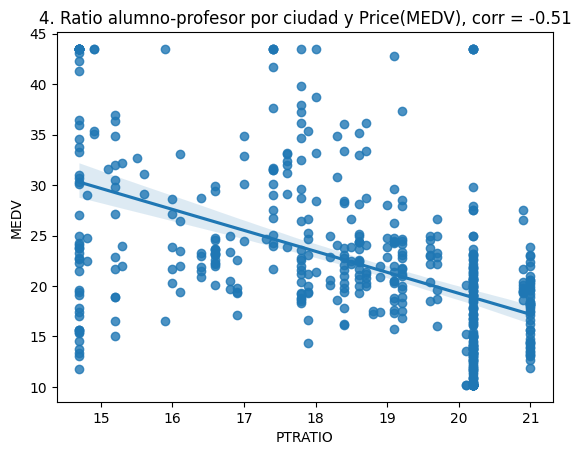

In [24]:
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

qqplot(df_wins['PTRATIO'], line = 's')
plt.show ()

# Chequear la normalidad de las variables seleccionadas
sns.distplot(df_wins['PTRATIO'])
print("4. ratio alumno-profesor por ciudad (Despues de Winsorize)")
plt.show()

sns.boxplot(df_wins['PTRATIO'])
plt.show()


# Correlacion entre PTRATIO y MEDV
sns.regplot(x="PTRATIO", y="MEDV", data=df_wins, fit_reg=True)
plt.title("4. Ratio alumno-profesor por ciudad y Price(MEDV), corr = -0.51")
plt.show()


### 3.5 TAX full-value property-tax rate per $10,000

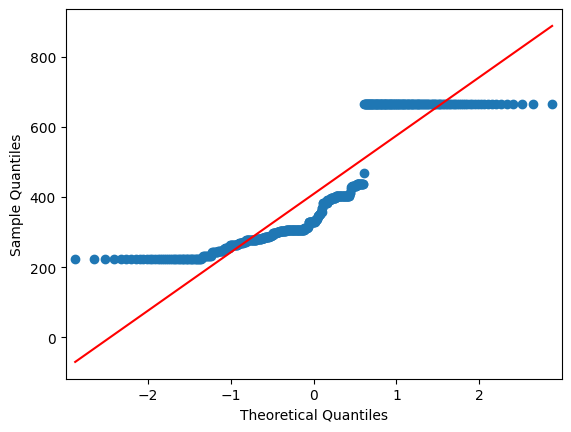

5. tipo del impuesto sobre bienes inmuebles de valor íntegro por 10.000 dólares (Despues de Winsorize)


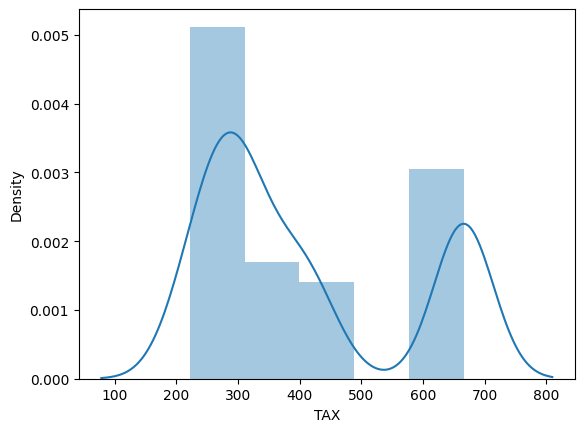

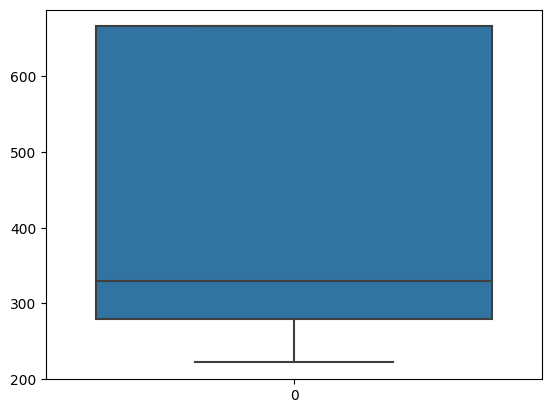

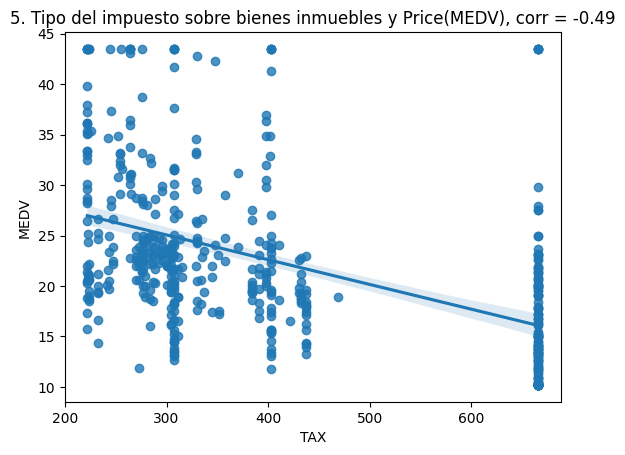

In [25]:
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

qqplot(df_wins['TAX'], line = 's')
plt.show ()


# Chequear la normalidad de las variables seleccionadas
sns.distplot(df_wins['TAX'])
print("5. tipo del impuesto sobre bienes inmuebles de valor íntegro por 10.000 dólares (Despues de Winsorize)")
plt.show()

sns.boxplot(df_wins['TAX'])
plt.show()

# Correlacion entre TAX y MEDV
sns.regplot(x="TAX", y="MEDV", data=df_wins, fit_reg=True)
plt.title("5. Tipo del impuesto sobre bienes inmuebles y Price(MEDV), corr = -0.49")
plt.show()


### 3.6 NOX nitric oxides concentration (parts per 10 million)

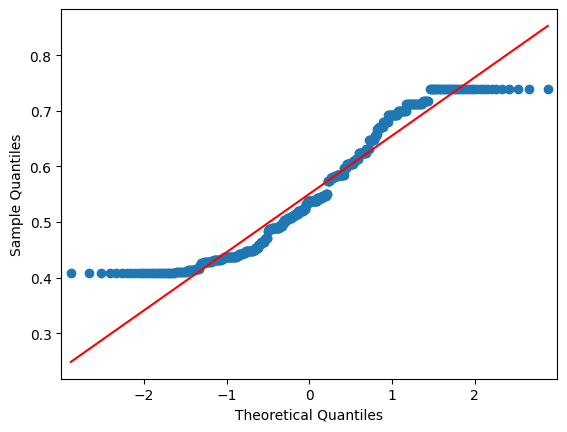

6. concentración de óxidos nítricos (Despues de Winsorize)


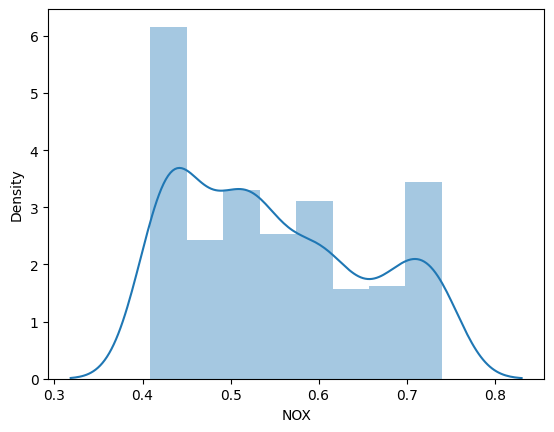

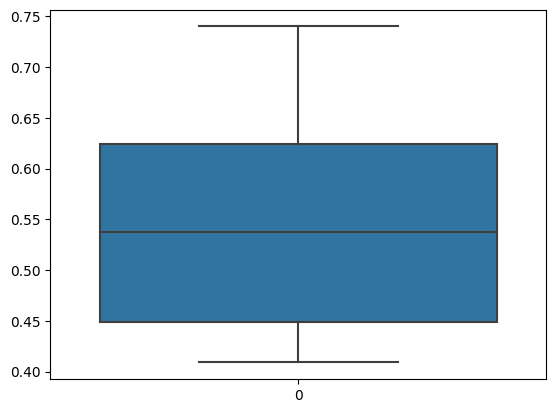

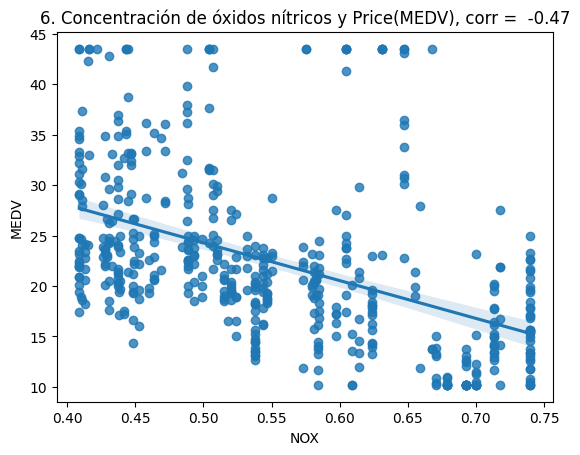

In [26]:

from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

qqplot(df_wins['NOX'], line = 's')
plt.show ()


# Chequear la normalidad de las variables seleccionadas
sns.distplot(df_wins['NOX'])
print("6. concentración de óxidos nítricos (Despues de Winsorize)")
plt.show()

sns.boxplot(df_wins['NOX'])
plt.show()

# Correlacion entre NOX y MEDV
sns.regplot(x="NOX", y="MEDV", data=df_wins, fit_reg=True)
plt.title("6. Concentración de óxidos nítricos y Price(MEDV), corr =  -0.47")
plt.show()


### 3.7 RAD index of accessibility to radial highways

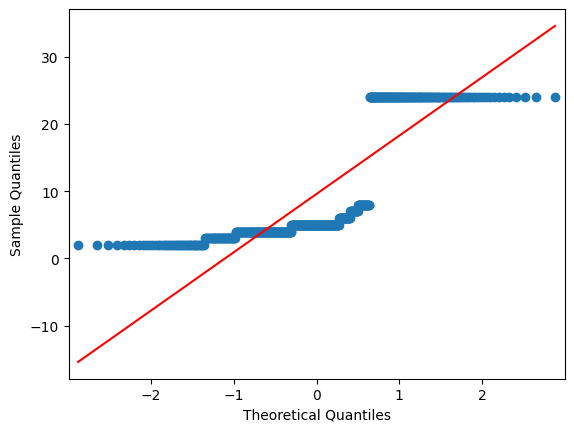

7. índice de accesibilidad a autopistas radiales (Despues de Winsorize)


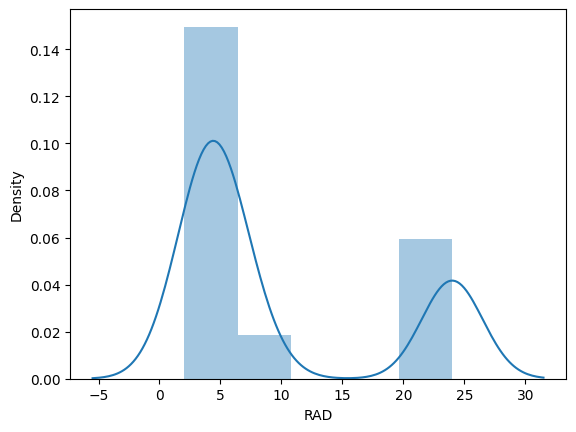

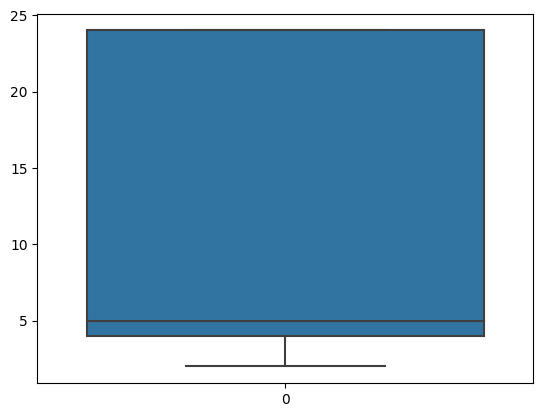

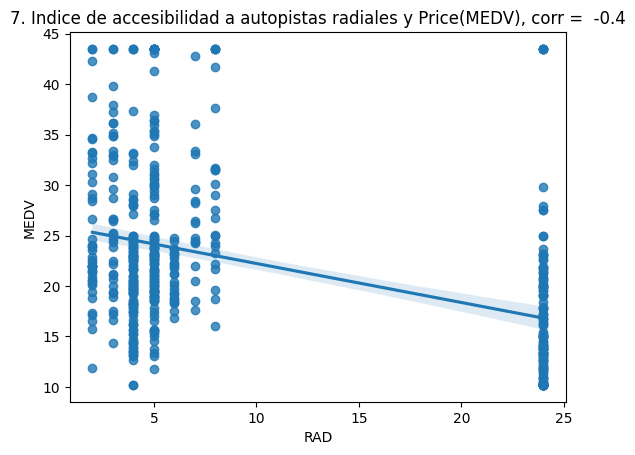

In [27]:
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

qqplot(df_wins['RAD'], line = 's')
plt.show ()


# Chequear la normalidad de las variables seleccionadas
sns.distplot(df_wins['RAD'])
print("7. índice de accesibilidad a autopistas radiales (Despues de Winsorize)")
plt.show()

sns.boxplot(df_wins['RAD'])
plt.show()

# Correlacion entre RAD y MEDV
sns.regplot(x="RAD", y="MEDV", data=df_wins, fit_reg=True)
plt.title("7. Indice de accesibilidad a autopistas radiales y Price(MEDV), corr =  -0.4")
plt.show()


### 4. Prueba de hipotesis de normalidad

Shapiro-Wilk test y D'Agostino's K-squared test son los mas utilizados para analisis de normalidad, se utiliza la primera.

Shapiro-Wilk test

H0: La distribución es normal

H1: La distribución no es normal

p <= α = rechazar H0  , p > α = NO rechazar H0

In [28]:
# utilizar una funcion para comparar p-value con α (nivel de significancia, alfa)
def check_p_val(p_value, alpha):

    if p_value <= alpha:
        print('la VAR NO tiene una distribucion normal')
    else:
        print('la VAR tiene una distribucion normal')


In [29]:
# Shapiro-Wilk test
from scipy import stats

print('prueba MEDV =', stats.shapiro(df_wins['MEDV']))
print('prueba LSTAT =', stats.shapiro(df_wins['LSTAT']))
print('prueba RM =', stats.shapiro(df_wins['RM']))
print('prueba INDUS =', stats.shapiro(df_wins['INDUS']))
print('prueba PTRATIO =', stats.shapiro(df_wins['PTRATIO']))


prueba MEDV = ShapiroResult(statistic=0.9246958494186401, pvalue=3.110689958792318e-15)
prueba LSTAT = ShapiroResult(statistic=0.9337225556373596, pvalue=3.3844770112563885e-14)
prueba RM = ShapiroResult(statistic=0.9626282453536987, pvalue=4.849368129278275e-10)
prueba INDUS = ShapiroResult(statistic=0.8738170862197876, pvalue=7.769408286973392e-20)
prueba PTRATIO = ShapiroResult(statistic=0.8837279081344604, pvalue=4.610887748081104e-19)


In [30]:
# comparar pvlue y α
print('MEDV' , check_p_val(3.110689958792318e-15 , 0.05))
print('LSTAT' , check_p_val(3.3844770112563885e-14 , 0.05) )
print('RM' , check_p_val(4.849368129278275e-10 , 0.05) )
print('INDUS' , check_p_val(7.769408286973392e-20, 0.05) )
print('PTRATIO' , check_p_val(4.610887748081104e-19 , 0.05) )


la VAR NO tiene una distribucion normal
MEDV None
la VAR NO tiene una distribucion normal
LSTAT None
la VAR NO tiene una distribucion normal
RM None
la VAR NO tiene una distribucion normal
INDUS None
la VAR NO tiene una distribucion normal
PTRATIO None


### 5. Normalizar datos

Se realizará en la Etapa 3 (en caso proceda), selección del modelo, conforme a los modelos seleccionados